# VGGnet
: 네트워크의 깊이를 깊게 만드는 것이 성능에 미치는 영향, kernel_size=3고정

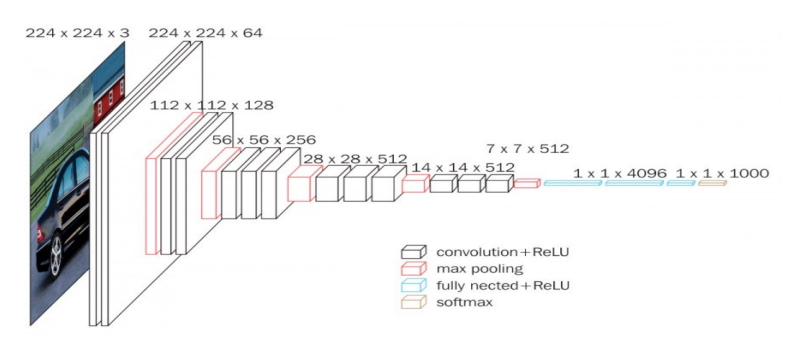

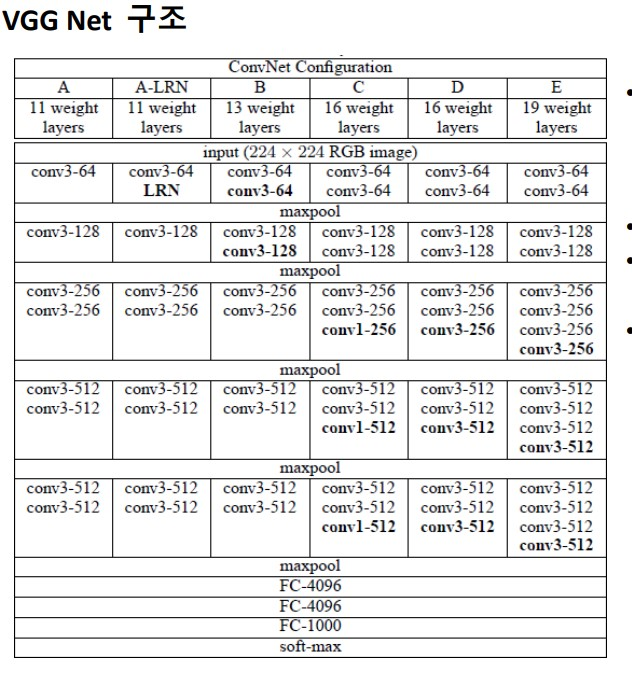

In [1]:
# D구조 - VGG16

In [1]:

import torch
import torch.nn as nn
import torch.nn.functional as F




In [2]:
NUM_CLASSES = 1000

## Model

In [12]:
class VGGNet16(nn.Module):
    def __init__(self, num_classes):
        super(VGGNet16, self).__init__()
        self.features = nn.Sequential(

            #input (3,244,244)

            nn.Conv2d(3 ,64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),              #inplace를 사용하면 relu에 들어온 X자체의 값이 변함
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            #(64, 112, 112)

            nn.Conv2d(64 ,128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),             
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            #(128, 56, 56)

            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),             
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            #(256, 28, 28)

            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),             
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            #(512, 14, 14)

            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),             
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
            #(512, 7, 7)
        )

        self.avgpool = nn.AdaptiveAvgPool2d((7,7))    #다양한 크기 입력에 대한 일관된 출력 가능
        
        self.classifier = nn.Sequential(
            nn.Linear(512*7*7, 4096),
            nn.ReLU(inplace = True),
            nn.Dropout(),

            nn.Linear(4096, 4096),
            nn.ReLU(inplace = True),
            nn.Dropout(),

            nn.Linear(4096, num_classes)
        )
        
    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)

        return x




In [14]:
import torch

model = VGGNet16(num_classes=1000)
inputs = torch.randn(1,3,224,224)
outputs = model(inputs)
print(outputs.shape)

torch.Size([1, 1000])
